# Set up parameter space, morphing, benchmark points

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.core import MadMiner
from madminer.plotting import plot_2d_morphing_basis

In [2]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_2/'

In [3]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'

## Parameter space

In [6]:
parameter_range = (-0.02, 0.02)
mm = MadMiner()

mm.add_parameter(
    lha_block='dim6',
    lha_id=1,
    parameter_name='cWWW',
    morphing_max_power=(2,),
    parameter_range=parameter_range
)
mm.add_parameter(
    lha_block='dim6',
    lha_id=2,
    parameter_name='cWWWtilde',
    morphing_max_power=(2,),
    parameter_range=parameter_range
)

16:35  Added parameter cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
16:35  Added parameter cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))


## Benchmark points

In [7]:
mm.add_benchmark(
    {'cWWW':0., 'cWWWtilde':0.},
    'sm'
)

16:35  Added benchmark sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00)


In [8]:
mm.set_benchmarks_from_morphing(
    keep_existing_benchmarks=True,
    n_trials=10000,
    n_test_thetas=10000,
    max_overall_power=(2,)
)

16:35  Optimizing basis for morphing
17:08  Added benchmark sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00)
17:08  Added benchmark morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02)
17:08  Added benchmark morphing_basis_vector_2: cWWW = 1.00e-02, cWWWtilde = 1.70e-02)
17:08  Added benchmark morphing_basis_vector_3: cWWW = -1.99e-02, cWWWtilde = 1.87e-02)
17:08  Added benchmark morphing_basis_vector_4: cWWW = 1.97e-02, cWWWtilde = -1.53e-02)
17:08  Added benchmark morphing_basis_vector_5: cWWW = -1.65e-02, cWWWtilde = -6.33e-03)


## Check morphing errors

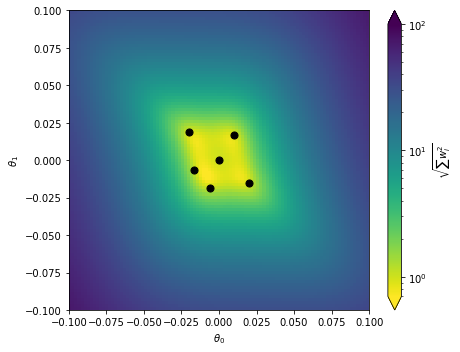

In [11]:
fig = plot_2d_morphing_basis(mm.morpher, xrange=(-0.1,0.1), yrange=(-0.1,0.1), crange=(0.7,100.))

## Systematics

In [5]:
mm.set_systematics(scale_variation=(0.5,1,2), pdf_variation="CT10")

## Save setup

In [7]:
mm.save(sample_dir + 'setup.h5')

18:17  Saving setup (including morphing) to /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/setup.h5
